<a href="https://colab.research.google.com/github/principioincertidumbre/ComputerVision/blob/main/IntroCV_Tarea_2_Sof%C3%ADa_Vits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 2</h1>
</center>

### Magíster en Data Science
### Universidad del Desarrollo

-----------------------
<div align="right">

Estudiante: Sofía Vits

Profesor: Takeshi Asahi

Fecha de Entrega: Jueves 8, Mayo 2025
</div>

# Introducción

La clasificación de imágenes es un método utilizado para categorizar automáticamente datos visuales según sus características. Por ejemplo, permite diferenciar entre fotografías de tejidos sanos y enfermos de distintos seres vivos. En el caso de este trabajo esta metodología permite distinguir entre papas sanas e infectadas por bacterias y hongos, lo cual tiene una importancia económica y de seguridad alimentaria debido a la relevancia del cultivo de la papa para la alimentación humana.

Previamente se pre-procesó el dataset "Potato Diseases Datasets" aplicando desenfoque Gaussiano, detección de bordes mediante la aplicación del filtro Sobel, aclarado de las imágenes mediante filtro Máximo, y oscurecimiento de imágenes al aplicar el filtro Mínimo.

Este dataset contiene 451 imágenes de papas clasificadas como infectadas por common scab, blackleg, dry rot, pink rot, y black scurf, papas sanas, y papas afectadas por otros tipos de infecciones.

Considerando las enfermedades más comunes de la papa en Chile, se consideraron las clases common scab, blackleg, dry rot y papas sanas para realizar una clasificación multiclase mediante la aplicación del algoritmo Support Vector Machines (SVM), utilizando para este fin el kernel Radial Basis Function (RBF). Esta muestra del dataset contiene 262 imágenes en total.

Los parámetros determinados para el algoritmo SVM multiclase corresponden a métricas de clasificación tales como accuracy, precision, recall y F1 score. Además, se medirán los tiempos de ejecución para el procesamiento del 50 % y 100 % de la muestra de imágenes de papas, tomando en cuenta cinco modelos basados en las imágenes sin aplicación de filtros y los cuatro filtros aplicados en el trabajo anterior.

Finalmente, se determinó el tipo de pre-procesamiento más adecuado para la clasificación de la muestra del dataset de papas.

Fuente del dataset utilizado:

https://www.kaggle.com/datasets/mukaffimoin/potato-diseases-datasets/

F. T. J. Faria, M. Bin Moin, A. Al Wase, M. R. Sani, K. M. Hasib and M. S. Alam, "Classification of Potato Disease with Digital Image Processing Technique: A Hybrid Deep Learning Framework," 2023 IEEE 13th Annual Computing and Communication Workshop and Conference (CCWC), Las Vegas, NV, USA, 2023, pp. 0820-0826, doi: 10.1109/CCWC57344.2023.10099162.

# Metodología

1.- Cargar la muestra del dataset y ordenar las carpetas a utilizar para el algoritmo de clasificación SVM multiclase.

2.- Implementar un algoritmo de clasificación SVM multiclase y kernel RBF, midiendo el tiempo mínimo, tiempo máximo, tiempo promedio y desviación estándard del tiempo de procesamiento.

3.- Comparar los resultados mediante métricas para verificar qué tipo de preprocesamiento permite obtener los mejores resultados.


# Desarrollo

## Flujo de procesamiento del dataset de papas


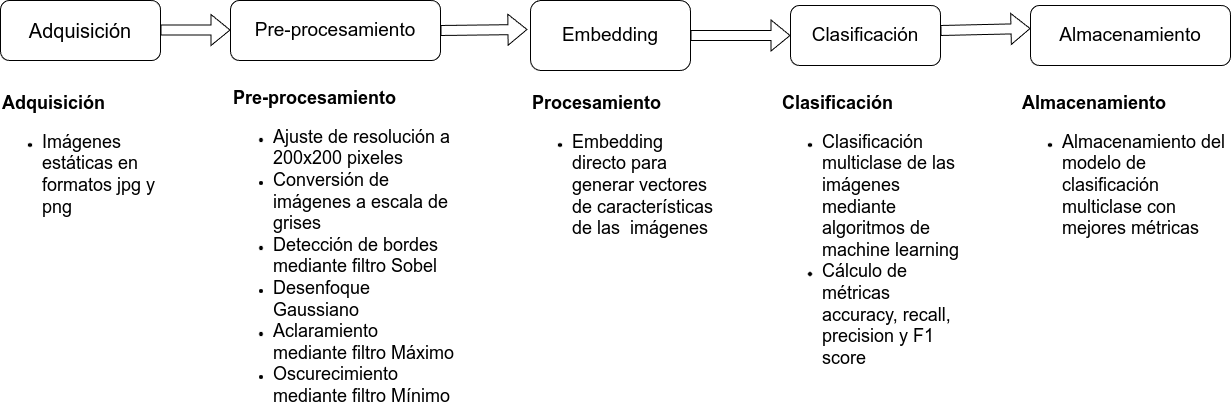

## Carga de librerías y definición de rutas de las carpetas que contienen las imágenes de la muestra del dataset de papas

In [1]:
from PIL import Image
from os.path import exists
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import pandas as pd
import time
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Abrir una imagen de cada carpeta que contiene imágenes de papas enfermas o sanas

inPath1  = '/content/drive/MyDrive/potato/Common Scab proc'
inPath2  = '/content/drive/MyDrive/potato/Blackleg proc'
inPath3  = '/content/drive/MyDrive/potato/Dry Rot proc'
inPath4 = '/content/drive/MyDrive/potato/Healthy Potatoes proc'
inPath5 = '/content/drive/MyDrive/potato/Common Scab Gauss'
inPath6 = '/content/drive/MyDrive/potato/Blackleg Gauss'
inPath7 = '/content/drive/MyDrive/potato/Dry Rot Gauss'
inPath8 = '/content/drive/MyDrive/potato/Healthy Potatoes Gauss'
inPath9 = '/content/drive/MyDrive/potato/Common Scab Sobel'
inPath10 = '/content/drive/MyDrive/potato/Blackleg Sobel'
inPath11 = '/content/drive/MyDrive/potato/Dry Rot Sobel'
inPath12 = '/content/drive/MyDrive/potato/Healthy Potatoes Sobel'
inPath13 = '/content/drive/MyDrive/potato/Common Scab Max'
inPath14 = '/content/drive/MyDrive/potato/Blackleg Max'
inPath15 = '/content/drive/MyDrive/potato/Dry Rot Maximum'
inPath16 = '/content/drive/MyDrive/potato/Healthy Potatoes Max'
inPath17 = '/content/drive/MyDrive/potato/Common Scab Min'
inPath18 = '/content/drive/MyDrive/potato/Blackleg Min'
inPath19 = '/content/drive/MyDrive/potato/Dry Rot Min'
inPath20 = '/content/drive/MyDrive/potato/Healthy Potatoes Min'

# Define carpetas de salida, las cuales serán creadas posteriormente en este trabajo

outPath1  = '/content/drive/MyDrive/potato/data/common_scab'
outPath2  = '/content/drive/MyDrive/potato/data/blackleg'
outPath3  = '/content/drive/MyDrive/potato/data/dry_rot'
outPath4 = '/content/drive/MyDrive/potato/data/healthy_potato'
outPath5 = '/content/drive/MyDrive/potato/data_g/common_scab'
outPath6 = '/content/drive/MyDrive/potato/data_g/blackleg'
outPath7 = '/content/drive/MyDrive/potato/data_g/dry_rot'
outPath8 = '/content/drive/MyDrive/potato/data_g/healthy_potato'
outPath9 = '/content/drive/MyDrive/potato/data_s/common_scab'
outPath10 = '/content/drive/MyDrive/potato/data_s/blackleg'
outPath11 = '/content/drive/MyDrive/potato/data_s/dry_rot'
outPath12 = '/content/drive/MyDrive/potato/data_s/healthy_potato'
outPath13 = '/content/drive/MyDrive/potato/data_max/common_scab'
outPath14 = '/content/drive/MyDrive/potato/data_max/blackleg'
outPath15 = '/content/drive/MyDrive/potato/data_max/dry_rot'
outPath16 = '/content/drive/MyDrive/potato/data_max/healthy_potato'
outPath17 = '/content/drive/MyDrive/potato/data_min/common_scab'
outPath18 = '/content/drive/MyDrive/potato/data_min/blackleg'
outPath19 = '/content/drive/MyDrive/potato/data_min/dry_rot'
outPath20 = '/content/drive/MyDrive/potato/data_min/healthy_potato'

## Ordena imágenes de papas en carpetas para facilitar su procesamiento

Este paso fue realizado para facilitar la división del dataset en conjuntos de entrenamiento y prueba.

In [ ]:
# Copia archivos

import glob

# Carpeta Common Scab
path = outPath1 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path):
    os.makedirs(path)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab proc/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path2 = outPath2

if not os.path.exists(path2):
    os.makedirs(path2)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path2,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path3 = outPath3

if not os.path.exists(path3):
    os.makedirs(path3)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path3,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path4 = outPath4

if not os.path.exists(path4):
    os.makedirs(path4)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes proc/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path4,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Gaussiano

import glob

# Carpeta Common Scab
path5 = outPath5 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path5):
    os.makedirs(path5)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Gauss/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path5,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path6 = outPath6

if not os.path.exists(path6):
    os.makedirs(path6)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path6,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path7 = outPath7

if not os.path.exists(path7):
    os.makedirs(path7)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path7,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path8 = outPath8

if not os.path.exists(path8):
    os.makedirs(path8)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path8,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Sobel

import glob

# Carpeta Common Scab
path9 = outPath9 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path9):
    os.makedirs(path9)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Sobel/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path9,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path10 = outPath10

if not os.path.exists(path10):
    os.makedirs(path10)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Sobel/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path10,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path11 = outPath11

if not os.path.exists(path11):
    os.makedirs(path11)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path11,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path12 = outPath12

if not os.path.exists(path12):
    os.makedirs(path12)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Gauss/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path12,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Máximo

import glob

# Carpeta Common Scab
path13 = outPath13 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path13):
    os.makedirs(path13)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Max/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path13,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path14 = outPath14

if not os.path.exists(path14):
    os.makedirs(path14)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path14,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path15 = outPath15

if not os.path.exists(path15):
    os.makedirs(path15)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Maximum/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path15,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path16 = outPath16

if not os.path.exists(path16):
    os.makedirs(path16)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Max/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path16,'/',os.path.split(filename)[1]))

In [ ]:
# Copia archivos filtro Mínimo

import glob

# Carpeta Common Scab
path17 = outPath17 #carpeta para guardar imágenes
# crea la carpeta de salida si no existe
if not os.path.exists(path17):
    os.makedirs(path17)

# bucle para copiar imágenes

for filename in glob.glob('/content/drive/MyDrive/potato/Common Scab Min/*.jpg'): # carpeta de origen
    img = Image.open(filename)
    # guarda las imágenes en la carpeta de salida
    img.save('{}{}{}'.format(path17,'/',os.path.split(filename)[1]))


#Carpeta Blackleg
path18 = outPath18

if not os.path.exists(path18):
    os.makedirs(path18)


for filename in glob.glob('/content/drive/MyDrive/potato/Blackleg Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path18,'/',os.path.split(filename)[1]))

# Carpeta Dry Rot

path19 = outPath19

if not os.path.exists(path19):
    os.makedirs(path19)


for filename in glob.glob('/content/drive/MyDrive/potato/Dry Rot Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path19,'/',os.path.split(filename)[1]))

# Carpeta Healthy Potatoes

path20 = outPath20

if not os.path.exists(path20):
    os.makedirs(path20)

for filename in glob.glob('/content/drive/MyDrive/potato/Healthy Potatoes Min/*.jpg'):
    img = Image.open(filename)
    img.save('{}{}{}'.format(path20,'/',os.path.split(filename)[1]))

## Resultado del pre-procesamiento del dataset de papas

En esta sección se muestran ejemplos de papas sanas e infectadas por blackleg, common scab, y dry rot. En todos los casos se comparan imágenes sin filtrar con fotografías a las cuales se les aplicó desenfoque Gaussiano, detección de bordes mediante un filtro Sobel, y filtros Máximo y Mínimo.

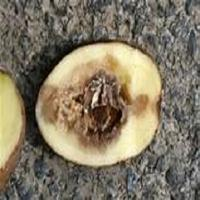

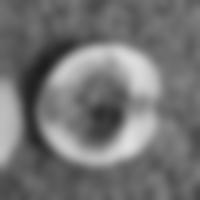

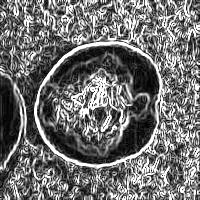

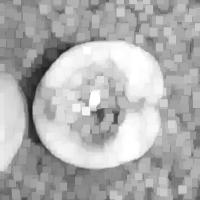

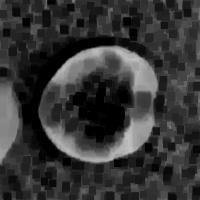

In [ ]:
# Compara papa afectada por blackleg antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im = Image.open('{}/25.jpg'.format(inPath2))
display(pil_im)

# Desenfoque Gaussiano
pil_im_g = Image.open('{}/25.jpg'.format(inPath6))
display(pil_im_g)

# Sobel
pil_im_s = Image.open('{}/25.jpg'.format(inPath10))
display(pil_im_s)

# Máximo
pil_im_m = Image.open('{}/25.jpg'.format(inPath14))
display(pil_im_m)

# Mínimo
pil_im_mi = Image.open('{}/25.jpg'.format(inPath18))
display(pil_im_mi)

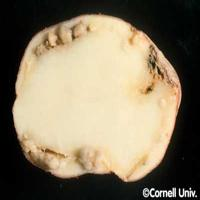

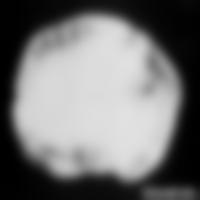

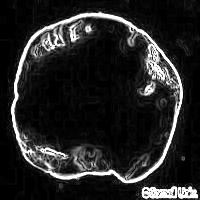

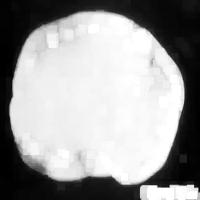

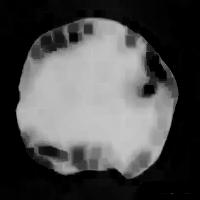

In [ ]:
# Compara papa afectada por blackleg antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im2 = Image.open('{}/50.jpg'.format(inPath2))
display(pil_im2)

# Desenfoque Gaussiano
pil_im_g2 = Image.open('{}/50.jpg'.format(inPath6))
display(pil_im_g2)

# Sobel
pil_im_s2 = Image.open('{}/50.jpg'.format(inPath10))
display(pil_im_s2)

# Máximo
pil_im_m2 = Image.open('{}/50.jpg'.format(inPath14))
display(pil_im_m2)

# Mínimo
pil_im_mi2 = Image.open('{}/50.jpg'.format(inPath18))
display(pil_im_mi2)

Se observan distintos tipos de lesiones causadas por blackleg en las imágenes de papas, lo cual podría dificultar su correcta clasificación. En ambos casos las lesiones se encuentran en la parte interna del tubérculo.

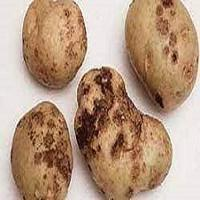

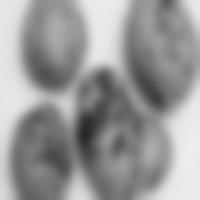

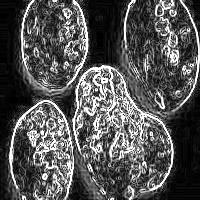

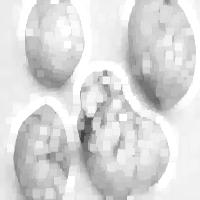

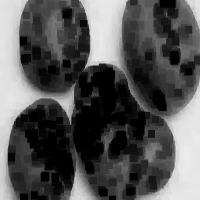

In [ ]:
# Compara papa afectada por common scab antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im3 = Image.open('{}/10.jpg'.format(inPath1))
display(pil_im3)

# Desenfoque Gaussiano
pil_im_g3 = Image.open('{}/10.jpg'.format(inPath5))
display(pil_im_g3)

# Sobel
pil_im_s3 = Image.open('{}/10.jpg'.format(inPath9))
display(pil_im_s3)

# Máximo
pil_im_m3 = Image.open('{}/10.jpg'.format(inPath13))
display(pil_im_m3)

# Mínimo
pil_im_mi3 = Image.open('{}/10.jpg'.format(inPath17))
display(pil_im_mi3)

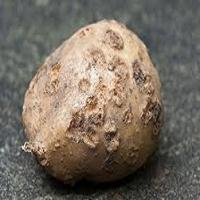

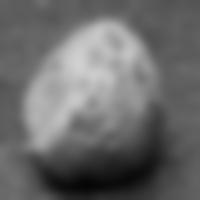

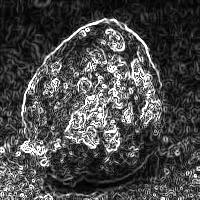

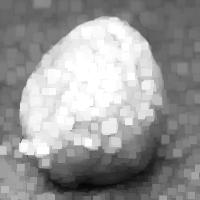

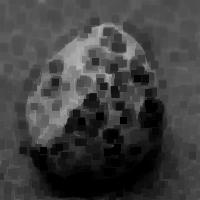

In [ ]:
# Compara papa afectada por common scab antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im4 = Image.open('{}/30.jpg'.format(inPath1))
display(pil_im4)

# Desenfoque Gaussiano
pil_im_g4 = Image.open('{}/30.jpg'.format(inPath5))
display(pil_im_g4)

# Sobel
pil_im_s4 = Image.open('{}/30.jpg'.format(inPath9))
display(pil_im_s4)

# Máximo
pil_im_m4 = Image.open('{}/30.jpg'.format(inPath13))
display(pil_im_m4)

# Mínimo
pil_im_mi4 = Image.open('{}/30.jpg'.format(inPath17))
display(pil_im_mi4)

En ambos ejemplos se comprueba que las lesiones causadas por common scab se encuentran en la superficie de las papas.

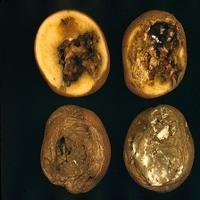

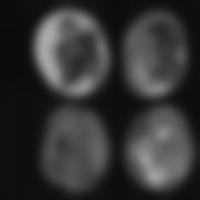

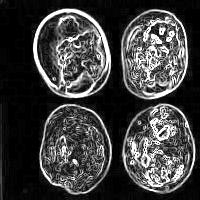

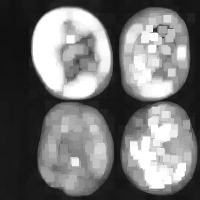

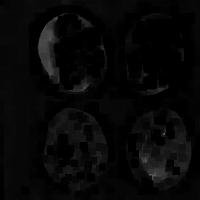

In [ ]:
# Compara papa afectada por dry rot antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im5 = Image.open('{}/31.jpg'.format(inPath3))
display(pil_im5)

# Desenfoque Gaussiano
pil_im_g5 = Image.open('{}/31.jpg'.format(inPath7))
display(pil_im_g5)

# Sobel
pil_im_s5 = Image.open('{}/31.jpg'.format(inPath11))
display(pil_im_s5)

# Máximo
pil_im_m5 = Image.open('{}/31.jpg'.format(inPath15))
display(pil_im_m5)

# Mínimo
pil_im_mi5 = Image.open('{}/31.jpg'.format(inPath19))
display(pil_im_mi5)

 Una de las papas apenas se distingue del fondo negro en la imagen a la cual se le aplicó el filtro Mínimo.

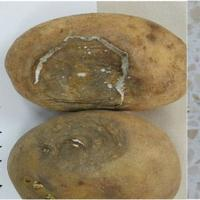

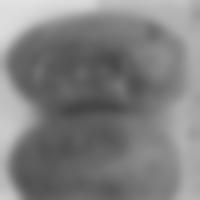

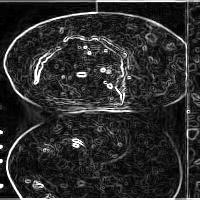

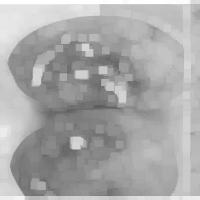

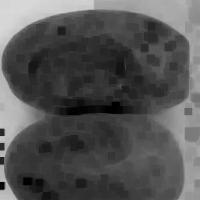

In [4]:
# Compara papa afectada por dry rot antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im6 = Image.open('{}/55.jpg'.format(inPath3))
display(pil_im6)

# Desenfoque Gaussiano
pil_im_g6 = Image.open('{}/55.jpg'.format(inPath7))
display(pil_im_g6)

# Sobel
pil_im_s6 = Image.open('{}/55.jpg'.format(inPath11))
display(pil_im_s6)

# Máximo
pil_im_m6 = Image.open('{}/55.jpg'.format(inPath15))
display(pil_im_m6)

# Mínimo
pil_im_mi6 = Image.open('{}/55.jpg'.format(inPath19))
display(pil_im_mi6)

Las lesiones causadas por dry rot presentan distintas formas, lo cual posiblemente dificulte su correcta clasificación.

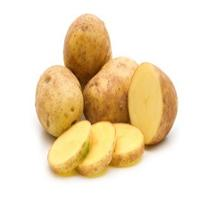

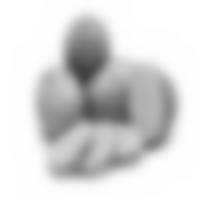

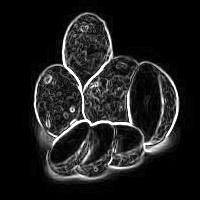

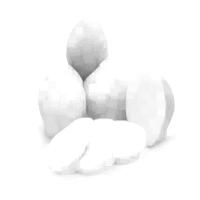

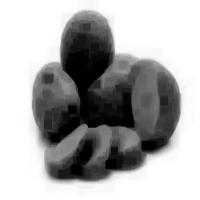

In [ ]:
# Compara papa sana antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im7 = Image.open('{}/55.jpg'.format(inPath4))
display(pil_im7)

# Desenfoque Gaussiano
pil_im_g7 = Image.open('{}/55.jpg'.format(inPath8))
display(pil_im_g7)

# Sobel
pil_im_s7 = Image.open('{}/55.jpg'.format(inPath12))
display(pil_im_s7)

# Máximo
pil_im_m7 = Image.open('{}/55.jpg'.format(inPath16))
display(pil_im_m7)

# Mínimo
pil_im_mi7 = Image.open('{}/55.jpg'.format(inPath20))
display(pil_im_mi7)

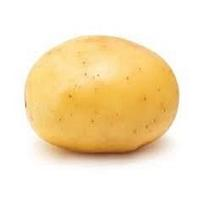

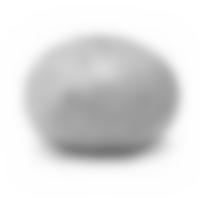

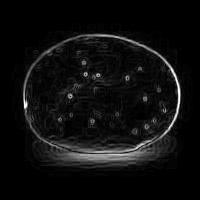

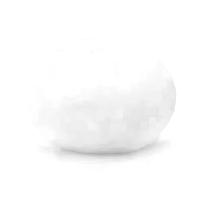

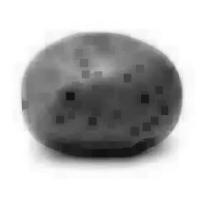

In [ ]:
# Compara papa sana antes y después de aplicar desenfoque Gaussiano, filtros Sobel, Máximo y Mínimo

# Original
pil_im8 = Image.open('{}/5.jpg'.format(inPath4))
display(pil_im8)

# Desenfoque Gaussiano
pil_im_g8 = Image.open('{}/5.jpg'.format(inPath8))
display(pil_im_g8)

# Sobel
pil_im_s8 = Image.open('{}/5.jpg'.format(inPath12))
display(pil_im_s8)

# Máximo
pil_im_m8 = Image.open('{}/5.jpg'.format(inPath16))
display(pil_im_m8)

# Mínimo
pil_im_mi8 = Image.open('{}/5.jpg'.format(inPath20))
display(pil_im_mi8)

El dataset contiene imágenes de papas sanas enteras y cortadas, lo cual es importante para distinguir estas papas de las papas infectadas, debido a que las infecciones blackleg, common scab y dry rot afectan distintas partes de los tubérculos. En el segudo ejemplo se verifica que la papa a la cual se le aplicó el filtro Máximo no se distingue correctamente del fondo blanco, lo cual debiera tener un impacto negativo en los resultados del algoritmo de clasificación.

## Clasificador Support Vector Machine para dataset sin filtrar

La determinación del tiempo de procesamiento del clasificador SVM fue realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

Las imágenes del dataset fueron transformadas en arrays 1D mediante embedding directo antes de realizar su clasificación.

In [ ]:
Categoría=['blackleg', 'common_scab', 'dry_rot', 'healthy_potato'] # etiquetas papas enfermas y sanas

In [ ]:
ex_time_nf = []
half_time_nf = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr=[]
    target_arr = []
    datadir ='/content/drive/MyDrive/potato/data'

    for i in Categoría:
        print(f'Cargando categoría: {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img)) # lee cada imagen del dataset
            img_resized=resize(img_array,(200,200,3))   # asegura que las imágenes tengan las mismas dimensiones y canales
            flat_data_arr.append(img_resized.flatten()) # transforma array en array 1D
            target_arr.append(Categoría.index(i)) # agrega los índices de cada etiqueta
    flat_data=np.array(flat_data_arr) # crea array de Numpy para imágenes
    target=np.array(target_arr) # crea array de Numpy para etiquetas
    df_papa=pd.DataFrame(flat_data) # genera dataframe a partir de los arrays de las imágenes
    df_papa['Categoría']=target # agrega columna con las etiquetas

    x=df_papa.iloc[:,:-1]
    y=df_papa.iloc[:,-1]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) # divide los datos en train y test asegurando que los resultados sean reproducibles

    classifier = SVC(kernel = 'rbf', random_state = 0) # fijar el random state asegura que los resultados sean reproducibles
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    end = time.perf_counter()
    total = end - start  # calcula tiempo total
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time_nf.append(total)
    half_t = (total/2)  # calcula valor para aproximar el tiempo que toma procesar el 50% de las imágenes
    half_time_nf.append(half_t)
    j +=1

Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 17.47469334399966 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 15.476148372999887 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.195435800999803 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.28941124899984 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.211465814999883 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.01493571400033 s
Cargand

## Determinación del tiempo de ejecución para el 50% y 100% de las imágenes clasificadas

In [ ]:
print("Tiempo mínimo ", min(ex_time_nf), 's')
print("Tiempo máximo: ", max(ex_time_nf), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_nf), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_nf), 's')

Tiempo mínimo  14.01493571400033 s
Tiempo máximo:  22.522511033000228 s
Tiempo promedio:  15.708147010599987 s
Desviación estándar del tiempo:  2.17902218733998 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_nf), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_nf), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_nf)/len(half_time_nf), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_nf), 's')

Tiempo mínimo mitad ejecución  7.007467857000165 s
Tiempo máximo mitad ejecución:  11.261255516500114 s
Tiempo promedio mitad ejecución:  7.8540735052999935 s
Desviación estándar del tiempo mitad ejecución:  1.08951109366999 s


## Matriz de confusión y métricas de clasificación correspondientes a las imágenes sin filtrar

In [ ]:
y_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 2, 1, 3, 3, 3, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 3, 1, 2, 0, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1,
       0, 0, 3, 0, 2, 1, 3, 0, 1])

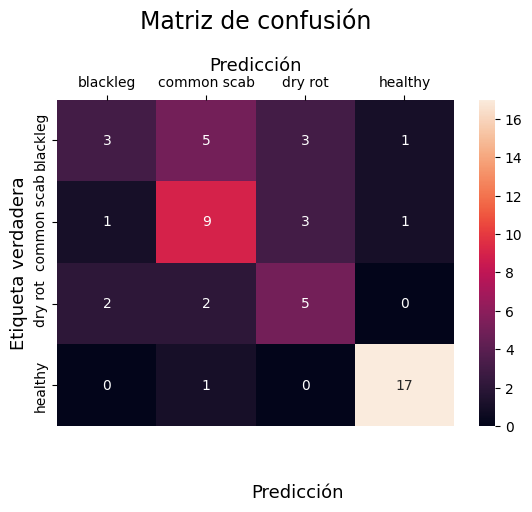

In [ ]:
# Matriz de confusión para SVM aplicado a imágenes no filtradas
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicción', ha='center', fontsize=13)
plt.show()

Las papas infectadas por blackleg fueron confundidas en cinco casos por papas infectadas por common scab, en tres casos como infectada por dry rot, y en un caso fue etiquetada una papa erróneamente como una papa sana.

En el caso de las papas infectadas por common scab, una fue clasificada erróneamente como papa infectada por blackleg, 3 fueron clasificadas como papas infectadas por dry rot, y una fue clasificada como una papa sana.

En el caso de las papas infectadas por dry rot, dos fueron clasificadas como papas infectadas por blackleg, y dos como infectadas por common scab.

En el caso de las papas sanas, casi todas fueron clasificadas correctamente, siendo una clasificada como papa infectada con common scab.



In [ ]:
print('Accuracy  :', accuracy_score(y_test, y_pred)*100 ,"%")
print('Precision :' , precision_score(y_test, y_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_test, y_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_test, y_pred, average='weighted')*100 ,"%")

Accuracy  : 64.15094339622641 %
Precision : 63.41120180129468 %
Recall    : 64.15094339622641 %
F1 Score  : 62.584099620009546 %


## Clasificador Support Vector Machine para dataset filtro Gaussiano

La determinación del tiempo de procesamiento del clasificador SVM fue realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

Las imágenes del dataset fueron transformadas en arrays 1D antes de realizar su clasificación.

In [ ]:
ex_time = []
half_time = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_g=[]
    target_arr_g=[]
    datadir_g='/content/drive/MyDrive/potato/data_g'

    for i in Categoría:
        print(f'Cargando categoría: {i}')
        path=os.path.join(datadir_g,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_g.append(img_resized.flatten())
            target_arr_g.append(Categoría.index(i))
    flat_data_g=np.array(flat_data_arr_g)
    target_g=np.array(target_arr_g)
    df_papa_g=pd.DataFrame(flat_data_g)
    df_papa_g['Categoría']=target_g
    df_papa_g

    x_g=df_papa_g.iloc[:,:-1]
    y_g=df_papa_g.iloc[:,-1]
    x_g_train,x_g_test,y_g_train,y_g_test=train_test_split(x_g,y_g,test_size=0.20,random_state=42)

    classifier_g = SVC(kernel = 'rbf', random_state = 0)
    classifier_g.fit(x_g_train, y_g_train)

    y_g_pred = classifier_g.predict(x_g_test)


    end = time.perf_counter()
    total = end - start
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time.append(total)
    half_t = (total/2)
    half_time.append(half_t)
    j +=1

Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 15.164452572999835 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.596228273000179 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.387280535000173 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 15.663008133999938 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 17.925130524999986 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 17.46296610699983 s
Carga

## Determinación del tiempo de ejecución para el 50% y 100% de las imágenes clasificadas

In [ ]:
print("Tiempo mínimo ", min(ex_time), 's')
print("Tiempo máximo: ", max(ex_time), 's')
print("Tiempo promedio: ", sum(ex_time)/len(ex_time),'s')
print("Desviación estándar del tiempo: ", np.std(ex_time), 's')

Tiempo mínimo  14.387280535000173 s
Tiempo máximo:  18.239867772000252 s
Tiempo promedio:  15.724718177200035 s
Desviación estándar del tiempo:  1.350715025625503 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time)/len(half_time), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time), 's')

Tiempo mínimo mitad ejecución  7.193640267500086 s
Tiempo máximo mitad ejecución:  9.119933886000126 s
Tiempo promedio mitad ejecución:  7.862359088600018 s
Desviación estándar del tiempo mitad ejecución:  0.6753575128127515 s


## Matriz de confusión y métricas de clasificación correspondientes a las imágenes pre-procesadas con filtro Gaussiano

In [ ]:
y_g_pred

array([3, 3, 3, 2, 0, 2, 2, 3, 0, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2, 2, 1,
       1, 3, 1, 1, 0, 2, 0, 2, 2, 3, 3, 1, 2, 2, 1, 3, 3, 0, 3, 2, 1, 2,
       0, 0, 3, 2, 1, 2, 3, 1, 0])

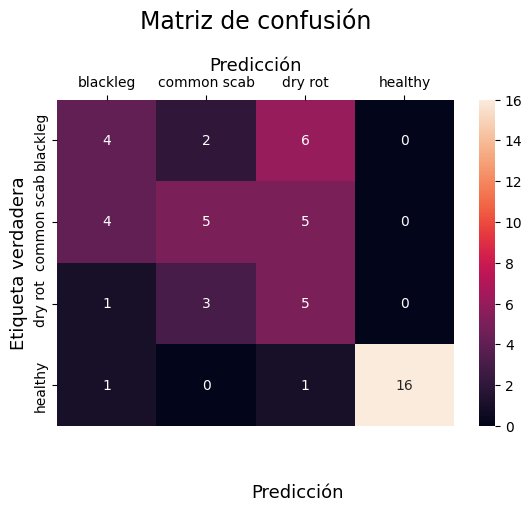

In [ ]:
cm = confusion_matrix(y_g_test, y_g_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicción', ha='center', fontsize=13)
plt.show()


En el caso de las papas infectadas con blackleg, dos fueron confundidas con papas infectadas por common scab, y seis fueron etiquetadas erróneamente como papas infectadas por dry rot.

En el caso de las papas infectadas por common scab, cuatro fueron etiquetadas como infectadas por blackleg, y cinco como infectadas por dry rot.

Para el caso de las papas afectadas por dry rot, una papa fue clasificada como infectada por blackleg, y tres papas fueron clasificadas como infectadas por common scab.

Una papa sana fue clasificada como papa infectada con blackleg y otra como infectada por dry rot.

In [ ]:
print('Accuracy  :', accuracy_score(y_g_test, y_g_pred)*100 ,"%")
print('Precision :' , precision_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_g_test, y_g_pred, average='weighted')*100 ,"%")

Accuracy  : 56.60377358490566 %
Precision : 61.22086570477248 %
Recall    : 56.60377358490566 %
F1 Score  : 57.73525401716301 %


## Clasificador Support Vector Machine para dataset filtro Sobel

La determinación del tiempo de procesamiento del clasificador SVM fue realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

Las imágenes del dataset fueron transformadas en arrays 1D antes de realizar su clasificación.

In [ ]:
ex_time_s = []
half_time_s = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_s=[]
    target_arr_s=[]
    datadir_s='/content/drive/MyDrive/potato/data_s'

    for i in Categoría:
        print(f'Cargando categoría: {i}')
        path=os.path.join(datadir_s,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_s.append(img_resized.flatten())
            target_arr_s.append(Categoría.index(i))
    flat_data_s=np.array(flat_data_arr_s)
    target_s=np.array(target_arr_s)
    df_papa_s=pd.DataFrame(flat_data_s)
    df_papa_s['Categoría']=target_s
    df_papa_s

    x_s=df_papa_s.iloc[:,:-1]
    y_s=df_papa_s.iloc[:,-1]
    x_s_train,x_s_test,y_s_train,y_s_test=train_test_split(x_s,y_s,test_size=0.20,random_state=42)

    classifier_s = SVC(kernel = 'rbf', random_state = 0)
    classifier_s.fit(x_s_train, y_s_train)

    y_s_pred = classifier_s.predict(x_s_test)


    end = time.perf_counter()
    total = end - start
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time_s.append(total)
    half_t = (total/2)
    half_time_s.append(half_t)
    j +=1

Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 17.758478774000196 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 27.42255014600005 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 16.565048181000293 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 16.533264883000356 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 15.710501283000212 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 14.599276844000087 s
Carga

## Determinación del tiempo de ejecución para el 50% y 100% de las imágenes clasificadas

In [ ]:
print("Tiempo mínimo ", min(ex_time_s), 's')
print("Tiempo máximo: ", max(ex_time_s), 's')
print("Tiempo promedio: ", sum(ex_time_nf)/len(ex_time_s), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_s), 's')

Tiempo mínimo  14.128926213999875 s
Tiempo máximo:  29.144938613999784 s
Tiempo promedio:  15.708147010599987 s
Desviación estándar del tiempo:  5.337749532768008 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_s), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_s), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_s)/len(half_time_s), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_s), 's')

Tiempo mínimo mitad ejecución  7.064463106999938 s
Tiempo máximo mitad ejecución:  14.572469306999892 s
Tiempo promedio mitad ejecución:  9.552281153933366 s
Desviación estándar del tiempo mitad ejecución:  2.668874766384004 s


## Matriz de confusión y métricas de clasificación correspondientes a las imágenes pre-procesadas con filtro Sobel

In [ ]:
y_s_pred

array([3, 3, 3, 1, 1, 2, 2, 3, 0, 1, 1, 3, 0, 3, 3, 3, 1, 0, 3, 1, 2, 2,
       0, 3, 1, 2, 2, 1, 0, 0, 0, 3, 3, 0, 1, 2, 0, 3, 3, 0, 3, 0, 1, 1,
       0, 2, 3, 0, 0, 2, 3, 2, 0])

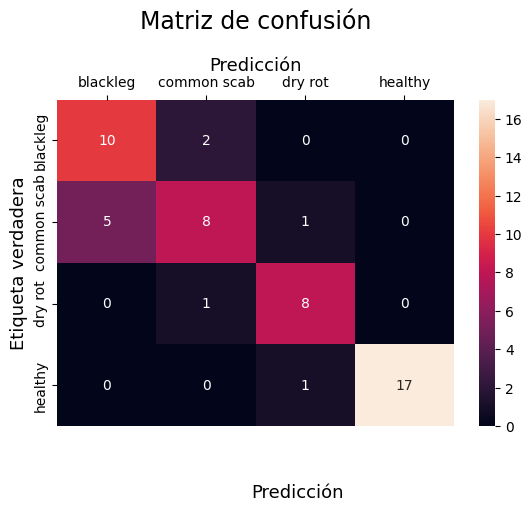

In [ ]:
cm = confusion_matrix(y_s_test, y_s_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicción', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, dos fueron clasificadas como infectadas con common scab.

En el caso de las papas infectadas por common scab, cinco fueron etiquetadas como papas afectadas por blackleg, y una como infectada por dry rot.

En el caso de las papas infectadas por dry rot, una papa fue clasificada como papa infectada por common scab.

Casi todas las papas sanas fueron clasificadas correctamente, excepto una que fue etiquetada como papa con dry rot.

In [ ]:
print('Accuracy  :', accuracy_score(y_s_test, y_s_pred)*100 ,"%")
print('Precision :' , precision_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_s_test, y_s_pred, average='weighted')*100 ,"%")

Accuracy  : 81.13207547169812 %
Precision : 81.852487135506 %
Recall    : 81.13207547169812 %
F1 Score  : 80.96896328872496 %


## Clasificador Support Vector Machine para dataset filtro Máximo
La determinación del tiempo de procesamiento del clasificador SVM fue realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

Las imágenes del dataset fueron transformadas en arrays 1D antes de realizar su clasificación.

In [ ]:
ex_time_max = []
half_time_max = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_max=[]
    target_arr_max=[]
    datadir_max='/content/drive/MyDrive/potato/data_max'

    for i in Categoría:
        print(f'Cargando categoría: {i}')
        path=os.path.join(datadir_max,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_max.append(img_resized.flatten())
            target_arr_max.append(Categoría.index(i))
    flat_data_max=np.array(flat_data_arr_max)
    target_max=np.array(target_arr_max)
    df_papa_max=pd.DataFrame(flat_data_max)
    df_papa_max['Categoría']=target_max
    df_papa_max

    x_max=df_papa_max.iloc[:,:-1]
    y_max=df_papa_max.iloc[:,-1]
    x_max_train,x_max_test,y_max_train,y_max_test=train_test_split(x_max,y_max,test_size=0.20,random_state=42)

    classifier_max = SVC(kernel = 'rbf', random_state = 0)
    classifier_max.fit(x_max_train, y_max_train)

    y_max_pred = classifier_max.predict(x_max_test)


    end = time.perf_counter()
    total = end - start
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time_max.append(total)
    half_t = (total/2)
    half_time_max.append(half_t)
    j +=1

Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 19.956944961000318 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 18.927476368000043 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 33.53560379400005 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 23.63933835900025 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 27.425562121999974 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 18.513082219000353 s
Cargan

## Determinación del tiempo de ejecución para el 50% y 100% de las imágenes clasificadas

In [ ]:
print("Tiempo mínimo ", min(ex_time_max), 's')
print("Tiempo máximo: ", max(ex_time_max), 's')
print("Tiempo promedio: ", sum(ex_time_max)/len(ex_time_max), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_max), 's')

Tiempo mínimo  14.738322061999952 s
Tiempo máximo:  34.599204164000184 s
Tiempo promedio:  22.04422109586676 s
Desviación estándar del tiempo:  6.1562605669152415 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_max), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_max))
print("Tiempo promedio mitad ejecución: ", sum(half_time_max)/len(half_time_max), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_max), 's')

Tiempo mínimo mitad ejecución  7.369161030999976 s
Tiempo máximo mitad ejecución:  17.299602082000092
Tiempo promedio mitad ejecución:  11.02211054793338 s
Desviación estándar del tiempo mitad ejecución:  3.0781302834576207 s


## Matriz de confusión y métricas de clasificación correspondientes a las imágenes pre-procesadas con filtro Máximo

In [ ]:
y_max_pred

array([3, 3, 3, 1, 1, 1, 2, 3, 1, 0, 1, 3, 0, 3, 3, 3, 1, 2, 3, 3, 2, 2,
       3, 3, 2, 2, 2, 1, 1, 3, 0, 3, 3, 0, 2, 3, 1, 3, 3, 2, 1, 2, 1, 0,
       0, 1, 3, 0, 1, 1, 3, 1, 0])

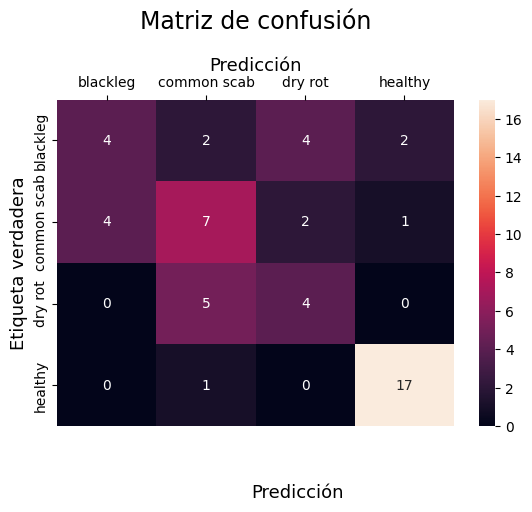

In [ ]:
cm = confusion_matrix(y_max_test, y_max_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicción', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, dos fueron clasificadas como infectadas con common scab, cuatro como infectadas por dry rot, y dos como papas sanas.

En el caso de las papas infectadas por common scab, siete fueron etiquetadas como papas afectadas por blackleg, dos como infectadas por dry rot, y una como una papa sana.

En el caso de las papas infectadas por dry rot, cinco fue clasificadas como papas infectada por common scab.

Casi todas las papas sanas fueron clasificadas correctamente, pero una fue clasificada como papa infectada por common scab.

In [ ]:
print('Accuracy  :', accuracy_score(y_max_test, y_max_pred)*100 ,"%")
print('Precision :' , precision_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_max_test, y_max_pred, average='weighted')*100 ,"%")

Accuracy  : 60.37735849056604 %
Precision : 59.30817610062893 %
Recall    : 60.37735849056604 %
F1 Score  : 59.34595760709516 %


## Clasificador Support Vector Machine para dataset filtro Mínimo
La determinación del tiempo de procesamiento del clasificador SVM fue realizada 15 veces, considerando desde la transformación de las imágenes a arrays hasta completar la predicción de las cuatro clases de papas. El tiempo del procesamiento del 50% de las imágenes será calculado dividiendo el tiempo total por dos.

Las imágenes del dataset fueron transformadas en arrays 1D antes de realizar su clasificación.

In [ ]:
ex_time_min = []
half_time_min = []

j = 1

while j < 16:
    start = time.perf_counter()

    flat_data_arr_min=[]
    target_arr_min=[]
    datadir_min='/content/drive/MyDrive/potato/data_min'

    for i in Categoría:
        print(f'Cargando categoría: {i}')
        path=os.path.join(datadir_min,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(200,200,3))
            flat_data_arr_min.append(img_resized.flatten())
            target_arr_min.append(Categoría.index(i))
    flat_data_min=np.array(flat_data_arr_min)
    target_min=np.array(target_arr_min)
    df_papa_min=pd.DataFrame(flat_data_min)
    df_papa_min['Categoría']=target_min
    df_papa_min

    x_min=df_papa_min.iloc[:,:-1]
    y_min=df_papa_min.iloc[:,-1]
    x_min_train,x_min_test,y_min_train,y_min_test=train_test_split(x_min,y_min,test_size=0.20,random_state=42)

    classifier_min = SVC(kernel = 'rbf', random_state = 0)
    classifier_min.fit(x_min_train, y_min_train)

    y_min_pred = classifier_min.predict(x_min_test)


    end = time.perf_counter()
    total = end - start
    print(f"Tiempo transcurrido: {(total)} s")
    ex_time_min.append(total)
    half_t = (total/2)
    half_time_min.append(half_t)
    j +=1

Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 20.721554887000366 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 23.188377548999597 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 21.311289135000152 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 20.647593902000153 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 29.89964672999986 s
Cargando categoría: blackleg
Cargando categoría: common_scab
Cargando categoría: dry_rot
Cargando categoría: healthy_potato
Tiempo transcurrido: 18.511402018000354 s
Carga

## Determinación del tiempo de ejecución para el 50% y 100% de las imágenes clasificadas

In [ ]:
print("Tiempo mínimo ", min(ex_time_min), 's')
print("Tiempo máximo: ", max(ex_time_min), 's')
print("Tiempo promedio: ", sum(ex_time_min)/len(ex_time_min), 's')
print("Desviación estándar del tiempo: ", np.std(ex_time_min), 's')

Tiempo mínimo  14.873305156999777 s
Tiempo máximo:  30.027327430999776 s
Tiempo promedio:  21.652521524333345 s
Desviación estándar del tiempo:  5.259892143267534 s


In [ ]:
print("Tiempo mínimo mitad ejecución ", min(half_time_min), 's')
print("Tiempo máximo mitad ejecución: ", max(half_time_min), 's')
print("Tiempo promedio mitad ejecución: ", sum(half_time_min)/len(half_time_min), 's')
print("Desviación estándar del tiempo mitad ejecución: ", np.std(half_time_min), 's')

Tiempo mínimo mitad ejecución  7.4366525784998885 s
Tiempo máximo mitad ejecución:  15.013663715499888 s
Tiempo promedio mitad ejecución:  10.826260762166672 s
Desviación estándar del tiempo mitad ejecución:  2.629946071633767 s


## Matriz de confusión y métricas de clasificación correspondientes a las imágenes pre-procesadas con filtro Mínimo

In [ ]:
y_min_pred

array([3, 3, 3, 1, 2, 1, 2, 3, 1, 1, 2, 3, 0, 3, 3, 3, 2, 2, 3, 1, 1, 2,
       0, 3, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 3, 3, 0, 3, 0, 2, 3,
       1, 1, 3, 2, 2, 1, 1, 1, 1])

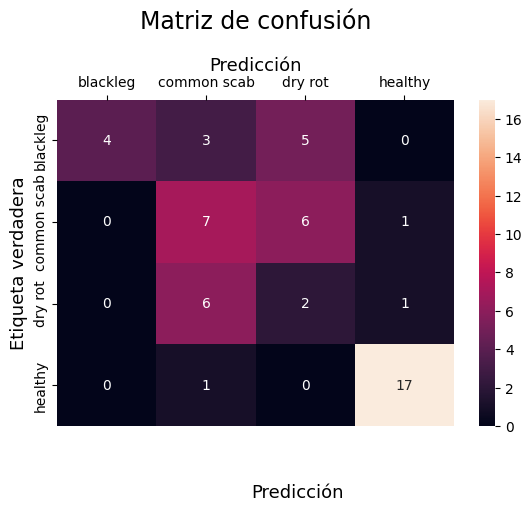

In [ ]:
cm = confusion_matrix(y_min_test, y_min_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'],
            yticklabels=['blackleg', 'common scab', 'dry rot', 'healthy'])

plt.ylabel('Etiqueta verdadera', fontsize=13)
plt.title('Matriz de confusión', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Predicción', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Predicción', ha='center', fontsize=13)
plt.show()

Analizando las etiquetas asignadas a las papas infectadas por blackleg, cuatro fueron clasificadas como infectadas con common scab y cinco como infectadas por dry rot.

En el caso de las papas infectadas por common scab, seis fueron etiquetadas como papas afectadas por dry rot, y una como papa sana.

En el caso de las papas infectadas por dry rot, seis fueron clasificadas como papas infectadas por common scab.

Casi todas las papas sanas fueron clasificadas correctamente, excepto una que fue clasificada como papa con common scab.

In [ ]:
print('Accuracy  :', accuracy_score(y_min_test, y_min_pred)*100 ,"%")
print('Precision :' , precision_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('Recall    :', recall_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")
print('F1 Score  :',f1_score(y_min_test, y_min_pred, average='weighted')*100 ,"%")

Accuracy  : 56.60377358490566 %
Precision : 66.51808382049634 %
Recall    : 56.60377358490566 %
F1 Score  : 57.54619777748202 %


## Análisis de resultados del procesamiento de la muestra del dataset de papas

   |**Modelo**| **Accuracy**| **Precision** | **Recall** | **F1 Score**|
|---|---|---|---|---|
| **Modelo 1 (SVM sin filtro)** |64.15 %| 63.41 %| 64.15 %| 62.58 %|,
| **Modelo 2 (SVM filtro Gaussiano)** | 56.60 % | 61.22 %| 56.60 %| 57.74 %|
| **Modelo 3 (SVM filtro Sobel)** | 81.13 % | 81.85 %| 81.13 %| 80.96 % |
|**Modelo 4 (SVM filtro Máximo)** | 60.38 % | 59.30 %| 60.38 %| 59.35 % |
| **Modelo 5 (SVM filtro Mínimo)** |56.60 % | 66.51 %| 56.60 %| 57.54 % |

Los mejores resultados fueron obtenidos al clasificar las imágenes a las cuales se les aplicó un filtro Sobel. Esto es corroborado al comparar los resultados de su matriz de confusión con las matrices de confusión de los modelos restantes.

Los filtros que no funcionaron bien para el caso de la clasificación multiclase fueron desenfoque Gaussiano, filtro Máximo y filtro Mínimo, siendo su F1 score inferior al del modelo que utilizó las imágenes sin aplicar un filtro.

Se puede concluir que es importante aumentar el contraste de las imágenes para clasificarlas correctamente, lo cual no fue logrado por los filtros de los modelos 2, 4 y 5. Se deduce que desenfocar las imágenes, aclararlas o oscurecerlas empeora la clasificación de las papas infectadas, distinguiendo solamente si la papa está sana o presenta alguna infección.

También se comprobó que utilizar detección de bordes permite obtener mejores resultados que al usar las imágenes originales para diferenciar entre las infecciones blackleg, common scab y dry rot.

 | **Modelo**      | **t min (s)**| **t máx (s)** | **t prom. (s)** | **std. t (s)**|
|---|---|---|---|---|
| **Modelo 1 (SVM sin filtro)** |14.01| 22.52| 15.71| 2.18|
| **Modelo 2 (SVM filtro Gaussiano)** | 14.39| 18.24| 15.72| 1.35|
| **Modelo 3 (SVM filtro Sobel)** | 14.13| 29.14|15.71| 5.34|
| **Modelo 4 (SVM filtro Máximo)** |14.74| 34.60| 22.04|6.15|
| **Modelo 5 (SVM filtro Mínimo)** |14.87|30.03|21.65|5.26|

Al comparar el tiempo total de ejecución de cada modelo se puede confirmar que el modelo 2 tuvo el menor tiempo máximo.
El modelo 4 fue el más lento de los cinco al comparar tiempo máximo y promedio, además de presentar la mayor desviación estándar del tiempo.

El modelo 3 tiene el tercer tiempo mínimo más bajo, siendo además su tiempo promedio igual al del modelo 1. Sin embargo, su desviación estándard del tiempo es igual a 5.34 segundos.

Se podría inferir que el tipo de filtro influye en la velocidad de procesamiento de las imágenes.

|**Modelo**| **t/2 min (s)**| **t/2 máx (s)** | **t/2 prom. (s)** | **std. t/2 (s)**|
|---|---|---|---|---|        
|**Modelo 1 (SVM sin filtro)** |7.01| 11.26| 7.85|  1.09|
|**Modelo 2 (SVM filtro Gaussiano)** | 7.19| 9.12|7.86|0.68|
|**Modelo 3 (SVM filtro Sobel)** |7.06|14.57|9.55|2.67|
| **Modelo 4 (SVM filtro Máximo)** |7.37|17.30| 10.83|3.08|
| **Modelo 5 (SVM filtro Mínimo)** |7.44| 15.01|8.54|2.63|
      

Al comparar el tiempo aproximado de procesamiento del 50% de las imágenes de cada modelo (t/2) se puede confirmar que el modelo 2 tuvo el menor tiempo máximo y la menor desviación estándar del tiempo de ejecución.

El modelo 3, el cual tuvo los mejores resultados en las métricas de clasificación, tuvo una velocidad de procesamiento aceptable.

# Conclusiones

El tipo de pre-procesamiento influye en el rendimiento del clasificador Support Vector Machine, como también en el tiempo de procesamiento de las imágenes. El  equilibrio entre calidad de resultados de clasificación y velocidad de procesamiento fue logrado por el modelo 3.

Por lo tanto, se puede concluir que para el caso de la muestra del dataset de papas lo más eficiente es aplicar un filtro Sobel a las imágenes durante su pre-procesamiento, debido a que las lesiones de las papas ocasionadas por diferentes tipos de bacterias y hongos presentan formas características que son resaltadas por la detección de bordes.